Introduction 

Over the last decade, there has been an increasing interest in food production in regards to the rising global population. This is largely due to articles like the one the United Nations produced concerning an alarming population increase in developing countries, showing the population rising to 9.8 billion people by 2050.  This estimate is based on 2010 censuses from 233 countries and other demographic data. While this data could be grossly hyped up, as much media tends to do, it raised a pivotal question: how will we feed the world? 

Sci-Fi genres aside, growing economic and health-related awareness in the United States could be seen through various media outlets in the forms of sustainability, health awareness, and government programs. Through this raised awareness, one of the working hypotheses of many scientists and economists has been to reduce meat intake and increase produce and vegetable-protein intakes. Academic articles ranging from the late nineties to present day concerning the health benefits of consuming less meat are higher in volume than sustainability-driven articles, at least within a simple Google search. Vegetable protein and produce production are thought to be more economical in comparison to meat production in terms of space, time, and energy, but the choices in such matters have been limited. Recently, more plant alternative proteins have been making the news and hitting markets. However, what I aim to explore in this paper is whether or not consumers are following the media blitzes through actual expenditure. 

Hypothesis

If American consumers are becoming increasingly food-conscious, then they are also buying more food-conscious and we can see that in the form of buying less meat. Should this be true across five years of data, then applications would include helping the FDA develop more guidelines for lab-grown vegetable and meat protein alternatives; more dedicated research to long-term effects on health and resources; and global food production initiatives. If the UN’s population prediction were accurate, it would be necessary to have these assurances for safety and health reasons.


Method

Using the Consumer Expenditure reports from the Bureau of Labor Statistics from 2010-2014, I initially explored the most recent five years of food data. I used the diary data, specifically pulling in the fmld CSV files, as the diary data is collected over 2 consecutive weeks, 4 times a year. It is meant specifically for smaller ticket items such as food purchases while the interview data is used for larger ticket items, such as cars and houses. There are four fmld CSV files in each diary data zip file, showing the data from each quarter that the surveyors were able to collect. This data has approximately 538 columns and 6,000-11,000 rows. Each column represents a different purchase while each row represents a different household. Using cat method in the command line, I was able to combine the four quarters for annual data concerning how much meat and produce each household bought for that year. The basic command line function for this was:


In [ ]:
$ cat < fmld141.csv <(tail +3 fmld142.csv) <(tail +3 fmld143.csv) <(tail +3 fmld144.csv) > veg14.csv

Doing this for each year, I was able to get the amount spent on each food item, which I then made columns for in Python. I labeled one column ‘MEAT’, which comprised of ‘BEEF’, ‘POULTRY’, ‘PORK’, ‘SEAFOOD’, and ‘OTHMEAT’. Next, I made a column for ‘PRODUCE’, comprised of ‘FRSHFRUIT’, ‘FRSHVEG’, ‘PROCFRUT’, and ‘PROCVEG’.  Below are the results and analysis, followed by a revised method and analysis.

Results and Analysis

One of the main components that I first explored was the money spent on meat versus produce. After initial results, I noticed that meat consumption seemed to be much higher. This wasn’t inline with my initial hypothesis, nor was it the suggested USDA diet. While I know that not everyone follows the food pyramid to the tee, I remembered that on the general whole, meat was more expensive than produce. I checked this across three different variables: family size, region, and age. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
veg14 = pd.read_table('/Users/reneehosogi/Documents/GitHub_Clones/Veg_Project/diaries10-14/veg14.csv', sep=',')
veg13 = pd.read_table('/Users/reneehosogi/Documents/GitHub_Clones/Veg_Project/diaries10-14/veg13.csv', sep=',')
veg12 = pd.read_table('/Users/reneehosogi/Documents/GitHub_Clones/Veg_Project/diaries10-14/veg12.csv', sep=',')
veg11 = pd.read_table('/Users/reneehosogi/Documents/GitHub_Clones/Veg_Project/diaries10-14/veg11.csv', sep=',')
veg10 = pd.read_table('/Users/reneehosogi/Documents/GitHub_Clones/Veg_Project/diaries10-14/veg10.csv', sep=',')
low_memory=False


In [ ]:
# Just checking nulls 

veg14.FOODTOT.isnull().sum()
veg13.FOODTOT.isnull().sum()
veg12.FOODTOT.isnull().sum()
veg11.FOODTOT.isnull().sum()
veg10.FOODTOT.isnull().sum()

In [4]:
# Creating the new columns for the overall meat and produce consumption

veg14['MEAT']=veg14.BEEF + veg14.POULTRY + veg14.PORK + veg14.SEAFOOD + veg14.OTHMEAT
veg14['PRODUCE']= veg14.FRSHFRUT + veg14.FRSHVEG + veg14.PROCFRUT + veg14.PROCVEG 

veg13['MEAT']=veg13.BEEF + veg13.POULTRY + veg13.PORK + veg13.SEAFOOD + veg13.OTHMEAT
veg13['PRODUCE']= veg13.FRSHFRUT + veg13.FRSHVEG + veg13.PROCFRUT + veg13.PROCVEG 

veg12['MEAT']=veg12.BEEF + veg12.POULTRY + veg12.PORK + veg12.SEAFOOD + veg12.OTHMEAT
veg12['PRODUCE']= veg12.FRSHFRUT + veg12.FRSHVEG + veg12.PROCFRUT + veg12.PROCVEG 

veg11['MEAT']=veg11.BEEF + veg11.POULTRY + veg11.PORK + veg11.SEAFOOD + veg11.OTHMEAT
veg11['PRODUCE']= veg11.FRSHFRUT + veg11.FRSHVEG + veg11.PROCFRUT + veg11.PROCVEG 

veg10['MEAT']=veg10.BEEF + veg10.POULTRY + veg10.PORK + veg10.SEAFOOD + veg10.OTHMEAT
veg10['PRODUCE']= veg10.FRSHFRUT + veg10.FRSHVEG + veg10.PROCFRUT + veg10.PROCVEG 


Initial Visuals

Meat and produce consumption in 2014, measured by family size. Produce is scaled to 600 USD while meat is scaled to 1000 USD.

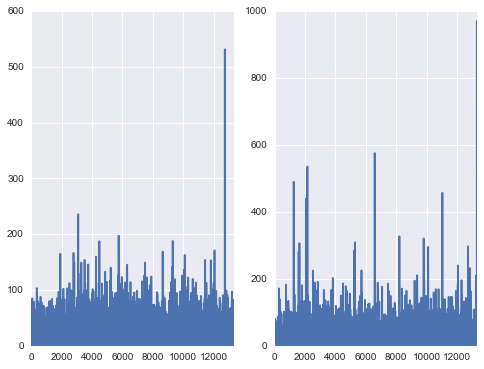

In [12]:
fig, axs = plt.subplots(1,2)

veg14['PRODUCE'].plot(x='FAM_SIZE', y='PRODUCE', ax=axs[0])
veg14['MEAT'].plot(x='FAM_SIZE', y='MEAT', ax=axs[1])

Meat and produce consumption in 2014, measured by age. Produce is scaled to 500 USD while meat goes up to about 1200 USD.

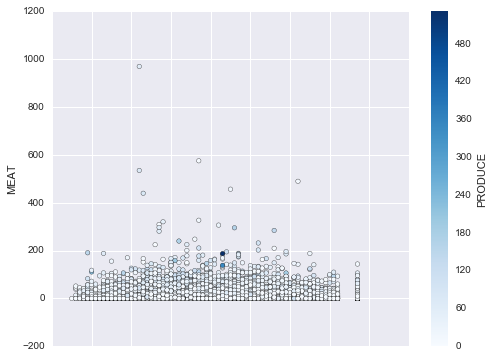

In [13]:
veg14.plot(kind='scatter', x='AGE_REF', y='MEAT', c='PRODUCE', colormap='Blues', sharey='true')

Meat and produce consumption in 2014, measured by region. Produce is scaled to 500 USD while meat is scaled to 1000 USD. Please see data dictionary for Region codes. 

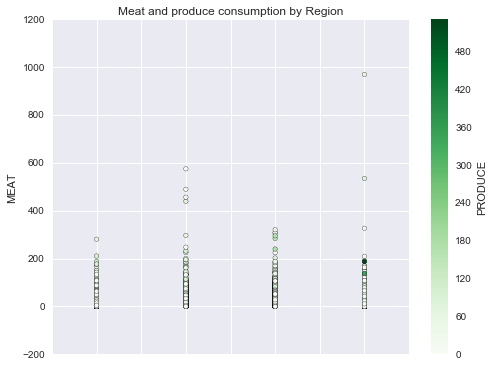

In [14]:
veg14.plot(kind='scatter', x='REGION', y='MEAT', c='PRODUCE', colormap='Greens', sharey='true', title='Meat and produce consumption by Region')

One of the main components that I first explored was the money spent on meat versus produce. After initial results, I noticed that meat consumption seemed to be much higher. This wasn’t inline with my initial hypothesis, nor was it the suggested USDA diet. While I know that not everyone follows the food pyramid to the tee, I remembered that on the general whole, meat was more expensive than produce. I checked this across three different variables: family size, region, and age. 

Once I noted this, I used the US Department of Labor’s annual price reports to average the yearly costs of meat, produce, and processed produce to come up with average prices per unit of food type. Below is the table of price per pound ($/500 g) that I used to divide the cost of each food product:

Year | Beef | Poultry |  Pork | Other Meat | Fresh Fruits | Fresh Veg |Proc Fruits | Proc. Veg 
--- | --- | --- | --- | --- | --- | --- | --- | --- | 
2014 | 5.71 | 2.04 | 3.83 | 3.01 | 1.49 | 1.57 | 2.53 | 1.47
2013 | 4.76 | 2.02 | 3.43 | 3.05 | 1.29 | 1.49 | 2.51 | 1.42
2012 | 4.57 | 1.97 | 3.37 | 2.92 | 1.34 | 1.42 | 2.66 | 1.44
2011 | 4.34 | 1.89 | 3.35 | 3.15 | 1.33 | 1.58 | 2.76 | 1.42
2010 | 5.26 | 1.96 | 3.10 | 3.22 | 1.32 | 1.15 | 2.47 | 1.33

Since regional costs per units weren’t posted, which would have given the numbers above another level of accuracy, this seemed to be the best solution to the price difference. The prices averaged were taken from the US averages of different product types, including different cuts of meats and different types of produce. Please see the attached appendix for the list of cuts of meat and types of produce factored into the price per unit averages.

Next, I made two new columns for number of meat units purchased and number of produce units purchased by taking each type of meat (beef, poultry, pork, and other meat) and each type of produce (fresh fruits, fresh vegetables, processed fruits, and processed vegetables) and dividing the columns by the appropriate price per unit. 

In [15]:
# Add in the units 
veg14['MEAT_UNIT']= (veg14.BEEF/5.71) + (veg14.POULTRY/2.04) + (veg14.PORK/3.83) + veg14.SEAFOOD + (veg14.OTHMEAT/3.01)
veg14['PROD_UNIT']= (veg14.FRSHFRUT/1.49) + (veg14.FRSHVEG/1.57) + (veg14.PROCFRUT/2.53) +(veg14.PROCVEG/1.47)

veg13['MEAT_UNIT']= (veg13.BEEF/4.76) + (veg13.POULTRY/2.02) + (veg13.PORK/3.43) + veg13.SEAFOOD + (veg13.OTHMEAT/3.05)
veg13['PROD_UNIT']= (veg13.FRSHFRUT/1.29) + (veg13.FRSHVEG/1.49) + (veg13.PROCFRUT/2.51) +(veg13.PROCVEG/1.42)

veg12['MEAT_UNIT']= (veg12.BEEF/4.57) + (veg12.POULTRY/1.97) + (veg12.PORK/3.37) + veg12.SEAFOOD + (veg12.OTHMEAT/2.92)
veg12['PROD_UNIT']= (veg12.FRSHFRUT/1.34) + (veg12.FRSHVEG/1.42) + (veg12.PROCFRUT/2.66) + (veg12.PROCVEG/1.44)

veg11['MEAT_UNIT']= (veg11.BEEF/4.34) + (veg11.POULTRY/1.89) + (veg11.PORK/3.35) + veg11.SEAFOOD + (veg11.OTHMEAT/3.15)
veg11['PROD_UNIT']= (veg11.FRSHFRUT/1.33) + (veg11.FRSHVEG/1.58) + (veg11.PROCFRUT/2.76) + (veg11.PROCVEG/1.42)

veg10['MEAT_UNIT']= (veg10.BEEF/5.26) + (veg10.POULTRY/1.96) + (veg10.PORK/3.10) + veg10.SEAFOOD + (veg10.OTHMEAT/3.22)
veg10['PROD_UNIT']= (veg10.FRSHFRUT/1.32) + (veg10.FRSHVEG/1.15) + (veg10.PROCFRUT/2.47) +(veg10.PROCVEG/1.33)

The numbers that came out for meat and produce in 2014 looked like this:

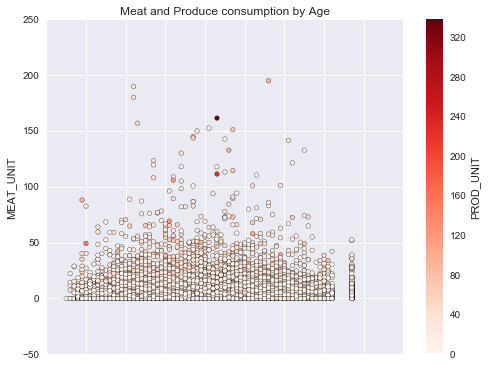

In [16]:
veg14.plot(kind='scatter', x='AGE_REF', y='MEAT_UNIT', c='PROD_UNIT', colormap='Reds', sharey='true', title='Meat and Produce consumption by Age')

From the graph above, we can see how many pounds of meat and produce each age group purchased in 2014. The scales are now about the same and we can see that while there are outliers, both large and small amogst the range of ages, we can also see that everything is predominantly concentrated in the 0-50 USD range.  

By family size:

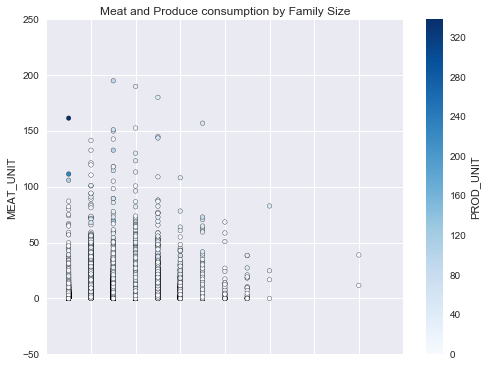

In [19]:
veg14.plot(kind='scatter', x='FAM_SIZE', y='MEAT_UNIT', c='PROD_UNIT', colormap='Blues', sharey='true', title='Meat and Produce consumption by Family Size')

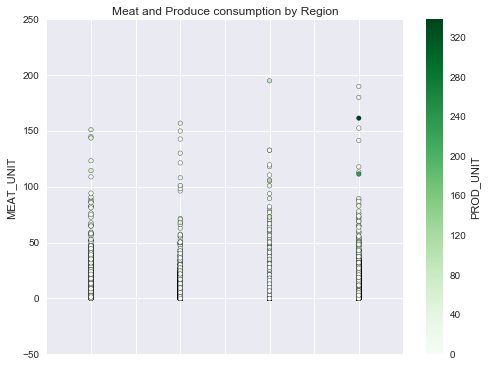

In [20]:
veg14.plot(kind='scatter', x='REGION', y='MEAT_UNIT', c='PROD_UNIT', colormap='Greens', sharey='true', title='Meat and Produce consumption by Region')

By frequency, we can see a direct compare/contrast to the data found in 2014. Individually it looks like meat units sold was higher than produce units sold. 

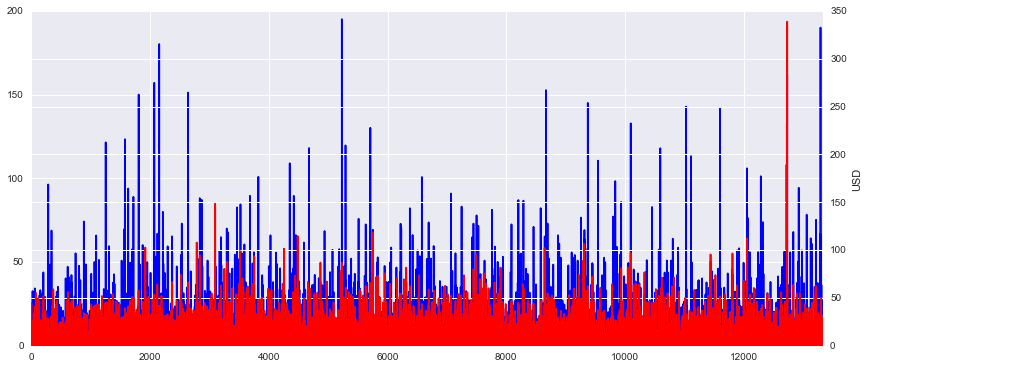

In [10]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.25))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=1.5)

veg14.MEAT_UNIT.plot(ax=ax, style='b-')
veg14.PROD_UNIT.plot(ax=ax2, style='r-', secondary_y=True)

plt.subplots_adjust(hspace=0.5)
plt.ylabel('USD')
plt.xlabel ('Data Sample')

While overall, the majority of data is within the same parameters, showing that people bought as many units of produce as they did meat. 

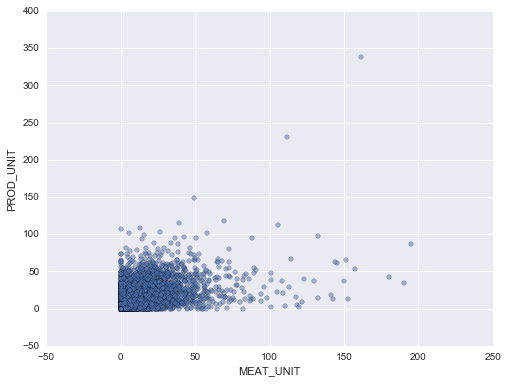

In [11]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
veg14.plot(kind='scatter', y='PROD_UNIT', x='MEAT_UNIT', alpha =0.5)

For some time, I was seeing a large increase in food consumption between 2010-2014, so I ran some graphs in trying to see what was causing the increase. I started with checking out the differences between food bought for the home and food consumed away from the home between 2010-2014, but the difference wasn’t great enough to merit the high jump, so I looked for another reason. When looking at the raw data for each of the meat and produce components, I noticed that the means on the general whole were much higher, but when going into the individual quarter files, I noticed that the mean averages for all of the different products were much lower than what I was seeing in Python, so I remade the all-up CSV files with the annual data. What came through after the remade CSV files were these graphs of meat units purchased by region:

In [25]:
veg1014 = pd.read_table('/Users/reneehosogi/Documents/GitHub_Clones/Veg_Project/diaries10-14/veg1014.csv', sep=',')
veg1014['MEAT_UNIT']= (veg1014.BEEF/4.928) + (veg1014.POULTRY/1.976) + (veg1014.PORK/3.461) + veg1014.SEAFOOD + (veg1014.OTHMEAT/3.07)
veg1014['PROD_UNIT']= (veg1014.FRSHFRUT/1.32) + (veg1014.FRSHVEG/1.15) + (veg1014.PROCFRUT/2.47) +(veg1014.PROCVEG/1.33)

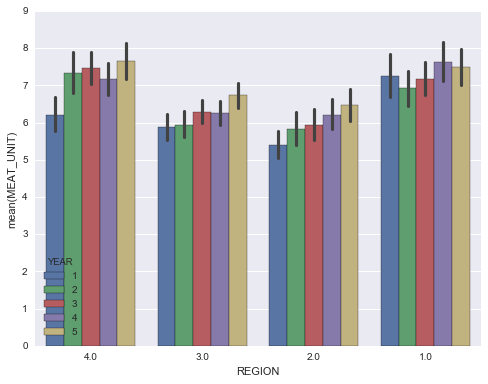

In [26]:
sns.barplot(x='REGION', y='MEAT_UNIT', hue='YEAR', data=veg1014);

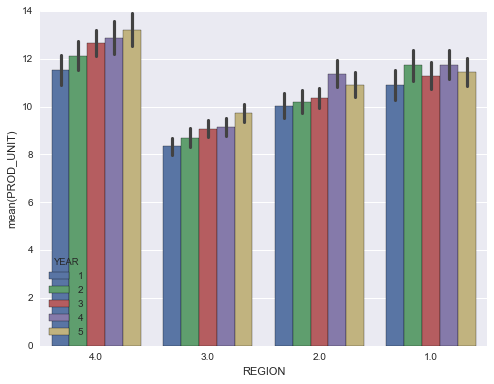

In [27]:
sns.barplot(x='REGION', y='PROD_UNIT', hue='YEAR', data=veg1014);

From these visualizations concerning regions and years, we can see that the meat and produce consumption remain fairly consistent, with both meat and produce having slightly positive linear trends. From the meat and produce consumption graphs by family size, we generally see a mutual increase in meat and produce as family size increases. This means that in fact people are eating more meat and not less, regardless of the price of meat increasing in the last five years. Economically, there isn’t evidence to support my initial hypothesis that people are eating less meat due to economical reasons. Measuring meat-intake based on people's perceived vision of themselves as environmentally sustainable would be interesting, but I’m not sure about getting that data to show in a non-biased way. While I found the Aetna study on how healthy people think they are versus how healthy they aren't, the study was based on 1,800 participants who likely had Aetna insurance. Aetna is rated as one of the premiere insurance companies, so anyone with that insurance provider would likely feel secure in their health benefits. 

In [ ]:
sns.barplot(x='REGION', y='FAM_SIZE', hue='YEAR', data=veg1014);

In [ ]:
sns.barplot(x='REGION', y='AGE_REF', hue='YEAR', data=veg1014);

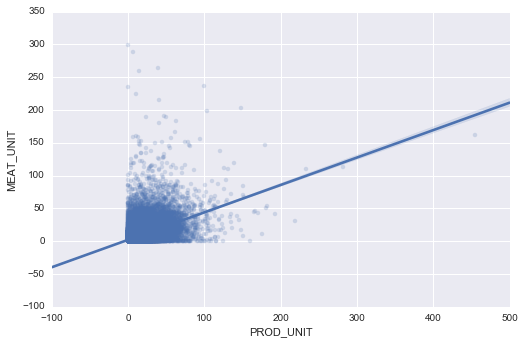

In [7]:
sns.lmplot(x='PROD_UNIT', y='MEAT_UNIT', data=veg1014, aspect=1.5, scatter_kws={'alpha':0.2})

In [14]:
feature_cols = ['MEAT_UNIT', 'PROD_UNIT']
X = veg1014[feature_cols]
y = veg1014.YEAR

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print linreg.intercept_
print linreg.coef_

3.0913190961
[ 0.00172146  0.00191542]


In [23]:
from sklearn import metrics
true = [1, 3, 6, 9]
pred = [8, 6, 5, 10]
print 'MAE:', metrics.mean_absolute_error(true, pred)
print 'MSE:', metrics.mean_squared_error(true, pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(true, pred))

MAE: 3.0
MSE: 15.0
RMSE: 3.87298334621


Prediction Modeling 

One of the most important parts of this project has been showing accurately what consumers are buying in terms of meat and produce. I think that while the initial model might be linear, given more future data it might prove to be more complex. At some point, the food supply would have to plateau therefore affecting purchasing trends, similar to what we've seen happen with other natural resources.  

Conclusion

One of the next steps I wanted to take was to take more data from previous years to paint a bigger picture. This was an idea I had in the initial stages of my project, but I realized that this would have likely preceded the linear trend already visualized. Not that playing with seaborn and matplotlib weren't fun, but the likelihood of having this data to challenge the rest wasn't as great as it was to support the linear model.

Further research

Another set of data that I’d like to explore more is the USDA’s Food Availability (per capita) data. This is used to show food availability, food loss, and nutrient availability, but I think it would be interesting to take some of that info and cross-reference it to the data I have to show price of foods, consumer consumption, and food loss and see if there’s any correlation.


Data Dictionary: | | |
--- | --- | --- |
REGION | 1 |Northeast
 | 2 | Midwest
 | 3 | South
 | 4 | West
Year | 1 | 2010
 | 2 | 2011
 | 3 | 2012
 | 4 | 2013
 | 5 | 2014
MEAT_UNIT |  | Measured 500g/unit
PROD_UNIT |  | Measured 500g/unit
All food items |  | Measured in estimated USD
AGE_REF |  | Age measured in years
FAM_SIZE | |  Family size

